# Topics in Artificial Intelligence
# Assignment 1: Intriduction to Deep Learning


In Section 1 of the notebook, we have implemented a single-layer supervised neural network for you, so no coding is necessary for this section. Sections 2 and 3 are where your coding expertise is needed, and you'll also be expected to answer specific questions. Section 4 is crafted to familiarize you with PyTorch. Beyond that, its primary purpose is to equip you with essential debugging strategies for training neural networks.

# Single-layer neural network
This section provides simple implementation of the single-layer supervised neural network that has 4 inputs and 3 outputs. First, let's review the skeleton of a single linear layer neural network. The inputs of the network are the variables $x_1, x_2, x_3, x_4$, or the input vector $\mathbf{x}=[x_1, x_2, x_3, x_4]$, the outputs of the network are $\widehat{y}_1,\widehat{y}_2,\widehat{y}_3$, or the output vector $\widehat{\mathbf{y}}=[\widehat{y}_1,\widehat{y}_2,\widehat{y}_3]$:

<br>
<center>
<img src="./images/1_layer_net.png" width="450">
</center>
<br>

The given $j$-th output $\widehat{y}_j$ of this single linear layer + activation function is computed as follows:

$$\widehat{y}_j= \text{sigmoid}(w_{1j}x_1 + w_{2j}x_2 + w_{3j}x_3 + w_{4j}x_4 + b_j) = \text{sigmoid}\Big(\sum_{i=1}^{i=4}w_{ij}x_{i} + b_j\Big)$$

In matrix notation, this would be: 

\begin{equation}
\begin{bmatrix}
  \widehat{y}_{1} \\ 
  \widehat{y}_{2} \\
  \widehat{y}_{3} 
\end{bmatrix}^T=\mathbf{Sigmoid}\Bigg(
\begin{bmatrix}
  x_{1} \\
  x_{2} \\
  x_{3} \\
  x_{4}
\end{bmatrix}^T
\begin{bmatrix}
  w_{1,1} & w_{1,2} & w_{1,3}\\
  w_{2,1} & w_{3,2} & w_{2,3}\\
  w_{3,1} & w_{3,2} & w_{3,3}\\
  w_{4,1} & w_{4,2} & w_{4,3}
\end{bmatrix}
+
\begin{bmatrix}
  b_{1} \\
  b_{2} \\
  b_{3}
\end{bmatrix}^T\Bigg)
\end{equation}

or more compactly:

\begin{equation}
\widehat{\mathbf{y}}^T = \mathbf{Sigmoid}(\mathbf{x}^T \cdot \mathbf{W} + \mathbf{b}^T)
\end{equation}

The element-wise sigmoid function is: $\mathbf{Sigmoid}(\mathbf{x}) = 1 \;/\; (1 + exp(-\mathbf{x}))$, or alternatively: $\mathbf{Sigmoid}(\mathbf{x}) = exp(\mathbf{x})\;/\;(1 + exp(\mathbf{x}))$. Here the sigmoid is separated logically into an activation layer $\sigma(x)$ and a linear layer $\text{linear}(3,4)$ as illustrated in figure. 

Training these weights $\mathbf{W}$ and biases $\mathbf{b}$ requires having many training pairs $(\widehat{\mathbf{y}}^{(m)}, \mathbf{x}^{(m)})$. The inputs $\mathbf{x}$ can be the pixels of an image, indices of words, the entries in a database, and the outputs $\widehat{\mathbf{y}}$ can also be literally anything, including a number indicating a category, a set of numbers indicating the indices of words composing a sentence, an output image itself, etc.

## Forward-propagation

Computing the outputs $\widehat{\mathbf{y}}$ from the inputs $\mathbf{x}$ in this network composed of a single linear layer, and a sigmoid layer, is called forward-propagation. Below is the code that implements these two operations:

In [1]:
import numpy as np
import numpy.matlib

class nn_Sigmoid:
    def forward(self, x):
        return 1 / (1 + np.exp(-x))

class nn_Linear:
    def __init__(self, input_dim, output_dim):
        # Initialized with random numbers from a gaussian N(0, 0.001)
        self.weight = np.matlib.randn(input_dim, output_dim) * 0.001
        self.bias = np.matlib.randn((1, output_dim)) * 0.001
        
    # y = Wx + b
    def forward(self, x):
        return np.dot(x, self.weight) + self.bias
    
    def getParameters(self):
        return [self.weight, self.bias]

# Let's test the composition of the two functions (forward-propagation in the neural network).
x1 = np.array([[1, 2, 2, 3]])
y_hat1 = nn_Sigmoid().forward(nn_Linear(4, 3).forward(x1))
print('x[1] = '+ str(x1))
print('y_hat[1] = ' + str(y_hat1) + '\n')

# Let's test the composition of the two functions (forward-propagation in the neural network).
x2 = np.array([[4, 5, 2, 1]])
y_hat2 = nn_Sigmoid().forward(nn_Linear(4, 3).forward(x2))
print('x[2] = '+ str(x2))
print('y_hat[2] = ' + str(y_hat2) + '\n')

# We can also compute both at once, which could be more efficient since it requires a single matrix multiplication.
x = np.concatenate((x1, x2), axis = 0)
y_hat = nn_Sigmoid().forward(nn_Linear(4, 3).forward(x))
print('x = ' + str(x))
print('y_hat = ' + str(y_hat))

x[1] = [[1 2 2 3]]
y_hat[1] = [[0.49912745 0.50019023 0.49871369]]

x[2] = [[4 5 2 1]]
y_hat[2] = [[0.5014294  0.49818687 0.49802967]]

x = [[1 2 2 3]
 [4 5 2 1]]
y_hat = [[0.50038513 0.49843649 0.50039801]
 [0.5013406  0.49910458 0.50344493]]


## Loss functions.

After computing the output predictions $\widehat{\mathbf{y}}$ it is necessary to compare these against the true values of $\mathbf{y}$. Let's call these true, correct, or desired values $\mathbf{y}$. Typically, a simple loss or cost function is used to measure the degree by which the prediction $\widehat{\mathbf{y}}$ is wrong with respect to $\mathbf{y}$. A common loss function for regression is the sum of squared differences between the prediction and its true value. Assuming a prediction $\widehat{\mathbf{y}}^{(d)}$ for our training sample $\mathbf{x}^{(d)}$ with true value $\mathbf{y}^{(d)}$, then the loss can be computed as:

$$loss(\widehat{\mathbf{y}}^{(d)}, \mathbf{y}^{(d)}) = (\widehat{y}^{(d)}_1 - y^{(d)}_1)^2 + (\widehat{y}^{(d)}_2 - y^{(d)}_2)^2 + (\widehat{y}^{(d)}_3 - y^{(d)}_3)^2 = \sum_{j=1}^{j=3}(\widehat{y}^{(d)}_j - y^{(d)}_j)^2$$

The goal is to modify the parameters [$\mathbf{W}, \mathbf{b}$] in the Linear layer so that the value of $loss(\widehat{\mathbf{y}}^{(d)}, \mathbf{y}^{(d)})$ becomes as small as possible for all training samples in a set $D=\{(\mathbf{x}^{(d)},\mathbf{y}^{(d)})\}$. This would in turn ensure that predictions $\widehat{\mathbf{y}}$ are as similar as possible to the true values $\mathbf{y}$. To achieve this we need to minimize the following function:

$$\mathcal{L}(\mathbf{W}, \mathbf{b}) = \sum_{d=1}^{d=|D|} loss(\widehat{\mathbf{y}}^{(d)}, \mathbf{y}^{(d)})$$

The only two variables for our model in the function $\mathcal{L}(\mathbf{W}, \mathbf{b})$ are $\mathbf{W}$ and $\mathbf{b}$, this is because the training dataset $D$ is fixed. Finding the values of $\mathbf{W}$ and $\mathbf{b}$ that minimize the the loss, particularly for complex functions, is typically done using gradient based optimization, like Stochastic Gradient Descent (SGD). 

In [2]:
class nn_MSECriterion:  # MSE = mean squared error.
    def forward(self, predictions, labels):
        return np.sum(np.square(predictions - labels))

# Let's test the loss function.
y_hat = np.array([[0.23, 0.25, 0.33], [0.23, 0.25, 0.33], [0.23, 0.25, 0.33], [0.23, 0.25, 0.33]])
y_true = np.array([[0.25, 0.25, 0.25], [0.33, 0.33, 0.33], [0.77, 0.77, 0.77], [0.80, 0.80, 0.80]])

nn_MSECriterion().forward(y_hat, y_true)

1.6271000000000002


## Backward-propagation (Backpropagation)

Backpropagation is just applying the chain-rule in calculus to compute the derivative of a function which is the composition of many functions (this is essentially definition of the neural network). 

Below is the implementation of required derivative computations for our simple network. You are highly advised to derive the derivatives implemented here to make sure you understand how one arrives at them. 

In [3]:
# This is referred above as f(u).
class nn_MSECriterion:
    def forward(self, predictions, labels):
        return np.sum(np.square(predictions - labels))
        
    def backward(self, predictions, labels):
        num_samples = labels.shape[0]
        return 2 * (predictions - labels)

# This is referred above as g(v).
class nn_Sigmoid:
    def forward(self, x):
        return 1 / (1 + np.exp(-x))
    
    def backward(self, x, gradOutput):
        # It is usually a good idea to use gv from the forward pass and not recompute it again here.
        gv = 1 / (1 + np.exp(-x))  
        return np.multiply(np.multiply(gv, (1 - gv)), gradOutput)

# This is referred above as h(W, b)
class nn_Linear:
    def __init__(self, input_dim, output_dim):
        # Initialized with random numbers from a gaussian N(0, 0.001)
        self.weight = np.matlib.randn(input_dim, output_dim) * 0.01
        self.bias = np.matlib.randn((1, output_dim)) * 0.01
        self.gradWeight = np.zeros_like(self.weight)
        self.gradBias = np.zeros_like(self.bias)
        
    def forward(self, x):
        return np.dot(x, self.weight) + self.bias
    
    def backward(self, x, gradOutput):
        # dL/dw = dh/dw * dL/dv
        self.gradWeight = np.dot(x.T, gradOutput)
        # dL/db = dh/db * dL/dv
        self.gradBias = np.copy(gradOutput)
        # return dL/dx = dh/dx * dL/dv
        return np.dot(gradOutput, self.weight.T)
    
    def getParameters(self):
        params = [self.weight, self.bias]
        gradParams = [self.gradWeight, self.gradBias]
        return params, gradParams
    

# Let's test some dummy inputs for a full pass of forward and backward propagation.
x1 = np.array([[1, 2, 2, 3]])
y1 = np.array([[0.25, 0.25, 0.25]])

# Define the operations.
linear = nn_Linear(4, 3)  # h(W, b)
sigmoid = nn_Sigmoid()  # g(v)
loss = nn_MSECriterion()  # f(u)

# Forward-propagation.
lin = linear.forward(x1)
y_hat = sigmoid.forward(lin)
loss_val = loss.forward(y_hat, y1) # Loss function.

# Backward-propagation.
dy_hat = loss.backward(y_hat, y1)
dlin = sigmoid.backward(lin, dy_hat)
dx1 = linear.backward(x1, dlin)

print('\n num_samples = ' + str(y1.shape[0]))

# Show parameters of the linear layer.
print('\nW = ' + str(linear.weight))
print('B = ' + str(linear.bias))

# Show the intermediate outputs in the forward pass.
print('\nx1    = '+ str(x1))
print('lin   = ' + str(lin))
print('y_hat = ' + str(y_hat))

print('\nloss = ' + str(loss_val))

# Show the intermediate gradients with respect to inputs in the backward pass.
print('\ndy_hat = ' + str(dy_hat))
print('dlin   = ' + str(dlin))
print('dx1    = ' + str(dx1))

# Show the gradients with respect to parameters.
print('\ndW = ' + str(linear.gradWeight))
print('dB = ' + str(linear.gradBias))


 num_samples = 1

W = [[ 0.00364952 -0.00253928 -0.00132826]
 [ 0.00698886 -0.00483975  0.00408318]
 [-0.00639023 -0.0026503  -0.01985642]
 [-0.01128974 -0.01302268  0.01060296]]
B = [[ 0.0064448  -0.01324314  0.00376829]]

x1    = [[1 2 2 3]]
lin   = [[-0.02257763 -0.06983057  0.00270242]]
y_hat = [[0.49435583 0.48254945 0.5006756 ]]

loss = 0.17662727684688795

dy_hat = [[0.48871167 0.46509889 0.50135121]]
dlin   = [[0.12216235 0.11613309 0.12533757]]
dx1    = [[-1.55415476e-05  8.03495565e-04 -3.57718857e-03 -1.56259591e-03]]

dW = [[0.12216235 0.11613309 0.12533757]
 [0.2443247  0.23226618 0.25067515]
 [0.2443247  0.23226618 0.25067515]
 [0.36648704 0.34839927 0.37601272]]
dB = [[0.12216235 0.11613309 0.12533757]]


## Gradient checking 

The gradients can also be computed with numerical approximation using the definition of derivatives. Let a single input pair $(\mathbf{x}, \mathbf{y})$ be the input, for each entry $w_{ij}$ in the weight matrix $\mathbf{W}$, the partial derivatives can be computed as follows:

$$\frac{\partial \mathcal{L}(\mathbf{W},\mathbf{b})}{\partial w_{ij}} = \frac{\mathcal{L}(\mathbf{W} + \mathbf{E}_{ij},b) - \mathcal{L}(\mathbf{W} - \mathbf{E}_{ij}, b)}{2\epsilon}, $$

where $\mathbf{E}_{ij}$ is a matrix that has $\epsilon$ in its $(i,j)$ entry and zeros everywhere else. Intuitively this gradient tells how would the value of the loss changes if we change a particular weight $w_{ij}$ by an $\epsilon$ amount. We can do the same to compute derivatives with respect to the bias parameters $b_i$. Below is the code that checks for a given input $(\mathbf{x}, \mathbf{y})$, the gradients for the matrix $\mathbf{W}$. 

In [4]:
# We will compute derivatives with respect to a single data pair (x,y)
x = np.array([[2.34, 3.8, 34.44, 5.33]])
y = np.array([[3.2, 4.2, 5.3]])

# Define the operations.
linear = nn_Linear(4, 3)
sigmoid = nn_Sigmoid()
criterion = nn_MSECriterion()

# Forward-propagation.
a0 = linear.forward(x)
a1 = sigmoid.forward(a0)
loss = criterion.forward(a1, y) # Loss function.

# Backward-propagation.
da1 = criterion.backward(a1, y)
da0 = sigmoid.backward(a0, da1)
dx = linear.backward(x, da0)

gradWeight = linear.gradWeight
gradBias = linear.gradBias

approxGradWeight = np.zeros_like(linear.weight)
approxGradBias = np.zeros_like(linear.bias)

# We will verify here that gradWeights are correct and leave it as an excercise
# to verify the gradBias.
epsilon = 0.0001
for i in range(0, linear.weight.shape[0]):
    for j in range(0, linear.weight.shape[1]):
        # Compute f(w)
        fw = criterion.forward(sigmoid.forward(linear.forward(x)), y) # Loss function.
        # Compute f(w + eps)
        shifted_weight = np.copy(linear.weight)
        shifted_weight[i, j] = shifted_weight[i, j] + epsilon
        shifted_linear = nn_Linear(4, 3)
        shifted_linear.bias = linear.bias
        shifted_linear.weight = shifted_weight
        fw_epsilon = criterion.forward(sigmoid.forward(shifted_linear.forward(x)), y) # Loss function
        # Compute (f(w + eps) - f(w)) / eps
        approxGradWeight[i, j] = (fw_epsilon - fw) / epsilon

# These two outputs should be similar up to some precision.
print('gradWeight: ' + str(gradWeight))
print('\napproxGradWeight: ' + str(approxGradWeight))

gradWeight: [[ -2.8395389   -4.27415088  -4.88126806]
 [ -4.61121701  -6.94092878  -7.92684556]
 [-41.79218789 -62.90673343 -71.84225292]
 [ -6.4678386   -9.73556589 -11.1184439 ]]

approxGradWeight: [[ -2.83942798  -4.27408499  -4.88105883]
 [ -4.6109245   -6.94075498  -7.92629378]
 [-41.76813508 -62.89240414 -71.79689136]
 [ -6.46726308  -9.73522389 -11.11735831]]


## Stochastic Gradient Descent.

The code below creates a dummy dataset that will be used for training. The inputs are 1000 vectors of size 4, and the outputs are 1000 vectors of size 3. The focus here is on training, however, in a real task one would check accuracy of the model on test (unseen) data.

In [5]:
dataset_size = 1000

# Generate random inputs within some range.
x = np.random.uniform(0, 6, (dataset_size, 4))
# Generate outputs based on the inputs using some function.
y1 = np.sin(x.sum(axis = 1))
y2 = np.sin(x[:, 1] * 6)
y3 = np.sin(x[:, 1] + x[:, 3])
y = np.array([y1, y2, y3]).T

print(x.shape)
print(y.shape)

(1000, 4)
(1000, 3)


To learn the parameters efficiently we will implement the stochastic gradient descent loop that moves the weights according to the gradients. In each iteration we sample an $(\mathbf{x}, \mathbf{y})$ pair and compute the gradients of the parameters, then we update the parameters according to the following gradient descent rules:

$$w_{ij} = w_{ij} - \lambda\frac{\partial \mathcal{L}(\mathbf{W},\mathbf{b})}{\partial w_{ij}}$$

$$b_i = b_i - \lambda\frac{\partial \mathcal{L}(\mathbf{W},\mathbf{b})}{\partial b_i}$$

where $\lambda$ is the learning rate. 

In [6]:
learningRate = 0.1

model = {}
model['linear'] = nn_Linear(4, 3)
model['sigmoid'] = nn_Sigmoid()
model['loss'] = nn_MSECriterion()

for epoch in range(0, 400):
    loss = 0
    for i in range(0, dataset_size):
        xi = x[i:i+1, :]
        yi = y[i:i+1, :]

        # Forward.
        a0 = model['linear'].forward(xi)
        a1 = model['sigmoid'].forward(a0)
        loss += model['loss'].forward(a1, yi)

        # Backward.
        da1 = model['loss'].backward(a1, yi)
        da0 = model['sigmoid'].backward(a0, da1)
        model['linear'].backward(xi, da0)

        model['linear'].weight = model['linear'].weight - learningRate * model['linear'].gradWeight
        model['linear'].bias = model['linear'].bias - learningRate * model['linear'].gradBias
    
    if epoch % 10 == 0: print('epoch[%d] = %.8f' % (epoch, loss / dataset_size))

epoch[0] = 1.48447598


epoch[10] = 1.42414927
epoch[20] = 1.41199173
epoch[30] = 1.40726673
epoch[40] = 1.40461489
epoch[50] = 1.40301827
epoch[60] = 1.40180605
epoch[70] = 1.40093270
epoch[80] = 1.40029277
epoch[90] = 1.39980642
epoch[100] = 1.39942330
epoch[110] = 1.39911185
epoch[120] = 1.39885217
epoch[130] = 1.39863139
epoch[140] = 1.39844086
epoch[150] = 1.39827455
epoch[160] = 1.39812805
epoch[170] = 1.39799809
epoch[180] = 1.39788211
epoch[190] = 1.39777810
epoch[200] = 1.39768443
epoch[210] = 1.39759977
epoch[220] = 1.39752302
epoch[230] = 1.39745326
epoch[240] = 1.39738972
epoch[250] = 1.39733174
epoch[260] = 1.39727878
epoch[270] = 1.39723036
epoch[280] = 1.39718609
epoch[290] = 1.39714563
epoch[300] = 1.39710869
epoch[310] = 1.39707501
epoch[320] = 1.39704436
epoch[330] = 1.39701650
epoch[340] = 1.39699119
epoch[350] = 1.39696818
epoch[360] = 1.39694721
epoch[370] = 1.39692802
epoch[380] = 1.39691038
epoch[390] = 1.39689409


# Two-layer neural network with 1-hidden layer.
In the previous section, we constructed a single-layer neural network that accepted input vectors of size 4 and produced output vectors of size 3. In this section, your challenge is to adapt the code to train a two-layer network, which includes one hidden layer with a size determined by hidden_state_size. Please note that hidden_state_size is a variable parameter that you should be able to adjust.

<br>
<center>
<img src="images/2_layer_net.png" width="450">
</center>
<br>


## Implementing the network and SGD learning.
Please modify the code of Section "Stochastic Gradient Descent" to implement a two-layer network and the SGD training procedure for it. 


In [19]:
hidden_state_size = 5;

# Your code goes here.
learningRate = 0.1

model = {}
model['linear1'] = nn_Linear(4, hidden_state_size)  # 第一个线性层，输出维度改为5
model['sigmoid1'] = nn_Sigmoid()    # 第一个 Sigmoid 激活层
model['linear2'] = nn_Linear(hidden_state_size, 3)  # 第二个线性层，输入维度为5，输出维度为3
model['sigmoid2'] = nn_Sigmoid()    # 第二个 Sigmoid 激活层
model['loss'] = nn_MSECriterion()

for epoch in range(0, 400):
    loss = 0
    for i in range(0, dataset_size):
        xi = x[i:i+1, :]
        yi = y[i:i+1, :]

        # Forward.
        a0 = model['linear1'].forward(xi) # 1st linear layer
        a1 = model['sigmoid1'].forward(a0)  # 1st Sigmoid activation layer
        a2 = model['linear2'].forward(a1)   # 2nd linear layer
        a3 = model['sigmoid2'].forward(a2)  # 2nd Sigmoid activation layer
        loss += model['loss'].forward(a3, yi)

        # Backward.
        da3 = model['loss'].backward(a3, yi)
        da2 = model['sigmoid2'].backward(a2, da3)  # 2nd Sigmoid activation layer
        da1 = model['linear2'].backward(a1, da2)   # 2nd linear layer
        da0 = model['sigmoid1'].backward(a0, da1)  # 1st Sigmoid activation layer
        model['linear1'].backward(xi, da0) # 1st linear layer

        # update parameters of the 1st model
        model['linear1'].weight = model['linear1'].weight - learningRate * model['linear1'].gradWeight
        model['linear1'].bias = model['linear1'].bias - learningRate * model['linear1'].gradBias

        # update parameters of the 2nd model
        model['linear2'].weight = model['linear2'].weight - learningRate * model['linear2'].gradWeight
        model['linear2'].bias = model['linear2'].bias - learningRate * model['linear2'].gradBias
        
    if epoch % 10 == 0: print('epoch[%d] = %.8f' % (epoch, loss / dataset_size))

epoch[0] = 1.52621689
epoch[10] = 1.47805770
epoch[20] = 1.47776005
epoch[30] = 1.47749647
epoch[40] = 1.47674484
epoch[50] = 1.47143648
epoch[60] = 1.44966197
epoch[70] = 1.44332226
epoch[80] = 1.43884466
epoch[90] = 1.43390181
epoch[100] = 1.42785084
epoch[110] = 1.42347313
epoch[120] = 1.42134655
epoch[130] = 1.42010173
epoch[140] = 1.41914596
epoch[150] = 1.41831790
epoch[160] = 1.41745769
epoch[170] = 1.41614065
epoch[180] = 1.41362562
epoch[190] = 1.40738988
epoch[200] = 1.39759735
epoch[210] = 1.39286607
epoch[220] = 1.39106534
epoch[230] = 1.39015205
epoch[240] = 1.38958756
epoch[250] = 1.38918894
epoch[260] = 1.38888087
epoch[270] = 1.38862790
epoch[280] = 1.38841160
epoch[290] = 1.38822163
epoch[300] = 1.38805179
epoch[310] = 1.38789806
epoch[320] = 1.38775768
epoch[330] = 1.38762859
epoch[340] = 1.38750920
epoch[350] = 1.38739819
epoch[360] = 1.38729448
epoch[370] = 1.38719714
epoch[380] = 1.38710537
epoch[390] = 1.38701849


## Gradient checking.
Check the gradients of the above network for both linear layer parameters $W_1$ and $W_2$ using some sample input pair ($\mathbf{x}$, $\mathbf{y}$). You will likely want to look and model this after Section "Gradient checking" above.

In [20]:
# Your code goes here.
epsilon = 1e-5

# initialize the matrices for storing the numerical gradients
numerical_grad_W1 = np.zeros_like(model['linear1'].weight)
numerical_grad_W2 = np.zeros_like(model['linear2'].weight)

# calculate the numerical gradients of W1
for i in range(model['linear1'].weight.shape[0]):
    for j in range(model['linear1'].weight.shape[1]):
        model['linear1'].weight[i, j] += epsilon
        shifted_loss = model['loss'].forward(model['sigmoid2'].forward(model['linear2'].forward(model['sigmoid1'].forward(model['linear1'].forward(xi)))), yi)
        
        model['linear1'].weight[i, j] -= epsilon # Reset to original value
        loss = model['loss'].forward(model['sigmoid2'].forward(model['linear2'].forward(model['sigmoid1'].forward(model['linear1'].forward(xi)))), yi)
        
        numerical_grad_W1[i, j] = (shifted_loss - loss) / epsilon

# calculate the numerical gradients of W2
for i in range(model['linear2'].weight.shape[0]):
    for j in range(model['linear2'].weight.shape[1]):
        model['linear2'].weight[i, j] += epsilon
        shifted_loss = model['loss'].forward(model['sigmoid2'].forward(model['linear2'].forward(model['sigmoid1'].forward(model['linear1'].forward(xi)))), yi)
        
        model['linear2'].weight[i, j] -= epsilon # Reset to original value
        loss = model['loss'].forward(model['sigmoid2'].forward(model['linear2'].forward(model['sigmoid1'].forward(model['linear1'].forward(xi)))), yi)
        
        numerical_grad_W2[i, j] = (shifted_loss - loss) / epsilon

# compare the analytical gradients with the numerical gradients
print("Analytical grad W1:", model['linear1'].gradWeight)
print("Numerical grad W1:", numerical_grad_W1)

print("Analytical grad W2:", model['linear2'].gradWeight)
print("Numerical grad W2:", numerical_grad_W2)


Analytical grad W1: [[0.00000000e+00 3.04744603e-07 3.14354003e-06 2.00890112e-06
  9.49486427e-07]
 [0.00000000e+00 6.84254082e-07 7.05830415e-06 4.51065836e-06
  2.13191622e-06]
 [0.00000000e+00 3.15813068e-07 3.25771486e-06 2.08186534e-06
  9.83972213e-07]
 [0.00000000e+00 3.31750438e-07 3.42211403e-06 2.18692577e-06
  1.03362794e-06]]
Numerical grad W1: [[0.00000000e+00 3.05200309e-07 3.14754889e-06 2.01174633e-06
  9.50772794e-07]
 [0.00000000e+00 6.85318469e-07 7.06716907e-06 4.51696458e-06
  2.13480345e-06]
 [0.00000000e+00 3.16280335e-07 3.26185745e-06 2.08482120e-06
  9.85322934e-07]
 [0.00000000e+00 3.32267547e-07 3.42645912e-06 2.19004814e-06
  1.03503872e-06]]
Analytical grad W2: [[-2.96363705e-03  8.94397981e-05 -2.85430534e-06]
 [-2.96348915e-03  8.94353346e-05 -2.85416290e-06]
 [-2.96197234e-03  8.93895588e-05 -2.85270205e-06]
 [-2.96274871e-03  8.94129889e-05 -2.85344978e-06]
 [-2.96318000e-03  8.94260049e-05 -2.85386516e-06]]
Numerical grad W2: [[-2.96890079e-03  8.943

## Activation functions.

As was covered in class, there are other activation functions that can be used instead of sigmoid. Implement below the forward and backward operation for two popular activation functions.

$$\text{ReLU}(\mathbf{x}) = \text{max}(0, \mathbf{x})$$

$$\text{Tanh($\mathbf{x}$)} = \text{tanh}(\mathbf{x}) = \frac{e^{\mathbf{x}} - e^{-\mathbf{x}}}{e^{\mathbf{x}} + e^{-\mathbf{x}}}$$

Note, that in the above activations are applied element-wise on the input vector $\mathbf{x}$.

In [21]:
# Rectified linear unit
class nn_ReLU:
    def forward(self, x):
        # Forward pass.
        return np.maximum(0, x)
    
    def backward(self, x, gradOutput):
        # Backward pass
        return np.multiply(np.where(x > 0, 1, 0), gradOutput)   
        
        
# Hyperbolic tangent.
class nn_Tanh:
    def forward(self, x):
        # Forward pass.
        return np.tanh(x)
    
    def backward(self, x, gradOutput):
        # Backward pass
        return np.multiply((1 - np.square(np.tanh(x))), gradOutput)


## Loss functions.

As discussed in class, there are other loss functions that can be used instead of a mean squared error. Implement the forward and backward operations for the following very common loss function where $\widehat{\mathbf{y}}$ is a vector of predicted values, and $\mathbf{y}$ is the vector with ground-truth labels. Assume both vectors are of size $n$. 

$\text{BinaryCrossEntropy}(\mathbf{y}, \widehat{\mathbf{y}}) = - \frac{1}{n}\sum_{i=1}^{i=n} [y_i\text{log}(\widehat{y}_i) + (1 - y_i)\text{log}(1 - \widehat{y}_i)]$,

The binary cross entropy loss assumes that the vector $\mathbf{y}$ only has values that are either 0 and 1, and the prediction vector $\widehat{\mathbf{y}}$ contains values between 0 and 1 (e.g. the output of a $\text{sigmoid}$ layer).

In [22]:
# Binary cross entropy criterion. Useful for classification as opposed to regression.
class nn_BCECriterion:
    def forward(self, predictions, labels):
        # Forward pass.
        n = labels.shape[0]
        return -(1 / n) * np.sum(np.multiply(labels, np.log(predictions)) + np.multiply((1 - labels), np.log(1 - predictions)))
        
    def backward(self, predictions, labels):
        # Backward pass.
        n = labels.shape[0]
        return (1 / n) * (predictions - labels) / (np.multiply(predictions, (1 - predictions)))

<b>Optional</b>: Most deep learning libraries support batches, meaning you can forward, and backward a set of inputs. So far the code supports batches in the forward pass. However, the backward pass does not support batches. Modify the code in backward function of the nn_Linear class to support batches. Then test the implementation by training the network in Section 2.1 using a batch size of 32. <span style="color:#666">(Keep in mind that the gradWeight and gradBias vectors should accumulate the gradients of each sample in the batch. This is because the gradient of the loss with respect to the batch is the sum of the gradients with respect to each sample in the batch. This means that for a batch of size 32, the sum will be over the 32 samples).</span>

# Behaviour of neural networks.

Prior to this section, all experiments were done in a dummy dataset where it is difficult to see how neural networks behave on more realistic data. In this section the goal is to get a feel for how newural networks behave and what effect hidden statest may play. Below is the code that generates and visualizes a classification dataset of 400 samples. 

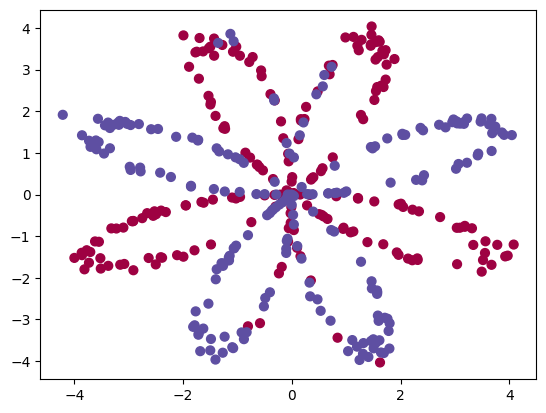

In [23]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
import sklearn
import sklearn.datasets
import sklearn.linear_model
import sklearn.datasets

def load_planar_dataset():
    np.random.seed(1)
    m = 400                # number of examples
    N = int(m/2)           # number of points per class
    D = 2                  # dimensionality
    X = np.zeros((m,D))    # data matrix where each row is a single example
    Y = np.zeros((m,1), dtype='uint8') # labels vector (0 for red, 1 for blue)
    a = 4                  # maximum ray of the flower

    for j in range(2):
        ix = range(N*j,N*(j+1))
        t = np.linspace(j*3.12,(j+1)*3.12,N) + np.random.randn(N)*0.2 # theta
        r = a*np.sin(4*t) + np.random.randn(N)*0.2                    # radius
        X[ix] = np.c_[r*np.sin(t), r*np.cos(t)]
        Y[ix] = j
        
    X = X.T
    Y = Y.T

    return X, Y

# Load the data
X, Y = load_planar_dataset();

# Visualize the data:
plt.scatter(X[0, :], X[1, :], c=Y[0, :], s=40, cmap=plt.cm.Spectral);

## Two-layer neural network with 1-hidden layer of size = 1.

Reimplement the network from Section "Implementing the network and SGD learning" here, train it and then display the results. 

epoch[0] = 0.24320365
epoch[10] = 0.24839155
epoch[20] = 0.24840609
epoch[30] = 0.24836885
epoch[40] = 0.24816505
epoch[50] = 0.24730817
epoch[60] = 0.24543288
epoch[70] = 0.24310437
epoch[80] = 0.23972534
epoch[90] = 0.23608457
epoch[100] = 0.23332022
epoch[110] = 0.23148968
epoch[120] = 0.23028013
epoch[130] = 0.22943413
epoch[140] = 0.22880130
epoch[150] = 0.22830072
epoch[160] = 0.22788845
epoch[170] = 0.22753928
epoch[180] = 0.22723764
epoch[190] = 0.22697323
epoch[200] = 0.22673875
epoch[210] = 0.22652884
epoch[220] = 0.22633938
epoch[230] = 0.22616718
epoch[240] = 0.22600967
epoch[250] = 0.22586480
epoch[260] = 0.22573089
epoch[270] = 0.22560654
epoch[280] = 0.22549060
epoch[290] = 0.22538210


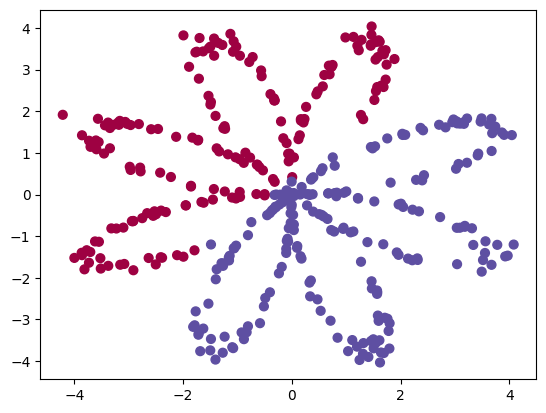

In [24]:
# Build a two-layer neural network (so one hidden layer) with sigmoid activations 
# and MSE loss. The hidden_state_dimensionality should be set to 1 using the variable
# below.
hidden_state_size = 1; 

# Define the 2-layer network here (fill in your code)
model = {}
model['linear1'] = nn_Linear(2, hidden_state_size)  # 1st linear layer
model['sigmoid1'] = nn_Sigmoid()    # 1st Sigmoid activation layer
model['linear2'] = nn_Linear(hidden_state_size, 1)  # 2nd linear layer
model['sigmoid2'] = nn_Sigmoid()    # 2nd Sigmoid activation layer
model['loss'] = nn_MSECriterion()

# Optimize the parameters of the neural network using stochastic gradient descent
# using the following parameters

learningRate = 0.01
numberEpochs = 300

X, Y = load_planar_dataset()
X = X.T
Y = Y.T

for epoch in range(0, numberEpochs):
    loss = 0
    for i in range(0, Y.size):        
        # Forward pass (fill in your code)
        a0 = model['linear1'].forward(X[i:i+1, :])
        a1 = model['sigmoid1'].forward(a0)
        a2 = model['linear2'].forward(a1)
        a3 = model['sigmoid2'].forward(a2)
        loss += model['loss'].forward(a3, Y[i:i+1, :])
        
        # Backward pass (fill in your code)
        da3 = model['loss'].backward(a3, Y[i:i+1, :])
        da2 = model['sigmoid2'].backward(a2, da3)
        da1 = model['linear2'].backward(a1, da2)
        da0 = model['sigmoid1'].backward(a0, da1)
        model['linear1'].backward(X[i:i+1, :], da0)
        
        # Update gradients (fill in your code)
        model['linear1'].weight = model['linear1'].weight - learningRate * model['linear1'].gradWeight
        model['linear1'].bias = model['linear1'].bias - learningRate * model['linear1'].gradBias
        
        model['linear2'].weight = model['linear2'].weight - learningRate * model['linear2'].gradWeight
        model['linear2'].bias = model['linear2'].bias - learningRate * model['linear2'].gradBias

    if epoch % 10 == 0: print('epoch[%d] = %.8f' % (epoch, loss / dataset_size))


%matplotlib inline

classEstimate = np.zeros((400,1), dtype='uint8')

for i in range(0, 400):        
    # Forward pass (fill in your code)
    a0 = model['linear1'].forward(X[i:i+1, :])
    a1 = model['sigmoid1'].forward(a0)
    a2 = model['linear2'].forward(a1)
    a3 = model['sigmoid2'].forward(a2)
        
    classEstimate[i,0] = (a3 > 0.5)
X = X.T
Y = Y.T
plt.scatter(X[0, :], X[1, :], c=classEstimate[:,0], s=40, cmap=plt.cm.Spectral);

## Two-layer neural network with 1-hidden layer of size = 5.

Redo the experiment with the hidden layer of size 5 and visualize the result. <b>Describe in a separate cell of the notebook what is different between the two runs </b>. What behavior did network with larger hidden state exhibit that the one with smaller one did not? Why? 

epoch[0] = 0.23116567
epoch[10] = 0.24457082
epoch[20] = 0.24432491
epoch[30] = 0.24304065
epoch[40] = 0.23987890
epoch[50] = 0.23744215
epoch[60] = 0.23644906
epoch[70] = 0.23540473
epoch[80] = 0.23309648
epoch[90] = 0.22892910
epoch[100] = 0.22399718
epoch[110] = 0.21987117
epoch[120] = 0.21698844
epoch[130] = 0.21496608
epoch[140] = 0.21319791
epoch[150] = 0.21070401
epoch[160] = 0.20498188
epoch[170] = 0.19129950
epoch[180] = 0.17276872
epoch[190] = 0.15734183
epoch[200] = 0.14617942
epoch[210] = 0.13819914
epoch[220] = 0.13237376
epoch[230] = 0.12800505
epoch[240] = 0.12463910
epoch[250] = 0.12197938
epoch[260] = 0.11982880
epoch[270] = 0.11805364
epoch[280] = 0.11656124
epoch[290] = 0.11528606


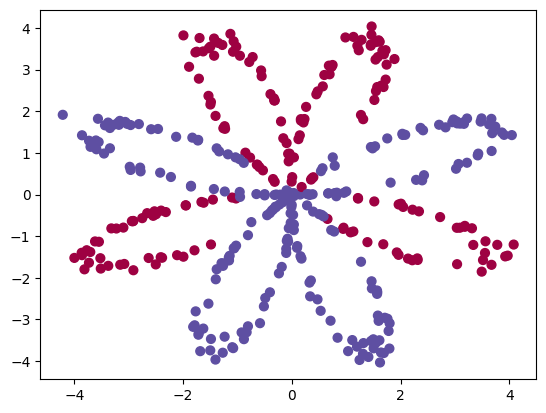

In [25]:
hidden_state_size = 5; 

# Rest should be taken from above 
# Define the 2-layer network here (fill in your code)
model = {}
model['linear1'] = nn_Linear(2, hidden_state_size)  # 1st linear layer
model['sigmoid1'] = nn_Sigmoid()    # 1st Sigmoid activation layer
model['linear2'] = nn_Linear(hidden_state_size, 1)  # 2nd linear layer
model['sigmoid2'] = nn_Sigmoid()    # 2nd Sigmoid activation layer
model['loss'] = nn_MSECriterion()

# Optimize the parameters of the neural network using stochastic gradient descent
# using the following parameters

learningRate = 0.01
numberEpochs = 300

X, Y = load_planar_dataset()
X = X.T
Y = Y.T

for epoch in range(0, numberEpochs):
    loss = 0
    for i in range(0, Y.size):        
        # Forward pass (fill in your code)
        a0 = model['linear1'].forward(X[i:i+1, :])
        a1 = model['sigmoid1'].forward(a0)
        a2 = model['linear2'].forward(a1)
        a3 = model['sigmoid2'].forward(a2)
        loss += model['loss'].forward(a3, Y[i:i+1, :])
        
        # Backward pass (fill in your code)
        da3 = model['loss'].backward(a3, Y[i:i+1, :])
        da2 = model['sigmoid2'].backward(a2, da3)
        da1 = model['linear2'].backward(a1, da2)
        da0 = model['sigmoid1'].backward(a0, da1)
        model['linear1'].backward(X[i:i+1, :], da0)
        
        # Update gradients (fill in your code)
        model['linear1'].weight = model['linear1'].weight - learningRate * model['linear1'].gradWeight
        model['linear1'].bias = model['linear1'].bias - learningRate * model['linear1'].gradBias
        
        model['linear2'].weight = model['linear2'].weight - learningRate * model['linear2'].gradWeight
        model['linear2'].bias = model['linear2'].bias - learningRate * model['linear2'].gradBias

    if epoch % 10 == 0: print('epoch[%d] = %.8f' % (epoch, loss / dataset_size))


%matplotlib inline

classEstimate = np.zeros((400,1), dtype='uint8')

for i in range(0, 400):        
    # Forward pass (fill in your code)
    a0 = model['linear1'].forward(X[i:i+1, :])
    a1 = model['sigmoid1'].forward(a0)
    a2 = model['linear2'].forward(a1)
    a3 = model['sigmoid2'].forward(a2)
        
    classEstimate[i,0] = (a3 > 0.5)
X = X.T
Y = Y.T
plt.scatter(X[0, :], X[1, :], c=classEstimate[:,0], s=40, cmap=plt.cm.Spectral);

1. Network with larger hidden state has higher accuracy.
2. Network with larger hidden state need more time to train and has lower convergence speed.

# PyTorch and Debugging.

In this section the goal is to experiment with PyTorch and also with the typical debugging techniques used in deep learning and simple debugging tools available to you. In this part, you are given a re-implementation of the dataset and neural network you worked with in the previous section of the assignment. However, this re-implementation is based on the data structures and functions available in PyTorch. Note that both the data loader and the model code contain a few strategically placed **bugs**. Your goal in this part of the assignment is to use the provided strategies to discover those bugs. 

## Dataloader 

First thing that typically happens in PyTorch code is definition of a dataloader. A dataloader is used to load and organize the data for training, validation and testing. We are providing a slightly buggy implementation below. 

In [63]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt

import torch
import torch.utils.data as data
import torch.nn as nn
import random

class PlanarDataset(data.Dataset):
    def __init__(self,num_examples=400):
        ## Function to initialize the dataset class
        np.random.seed(1)
        m = 400                  # number of examples
        N = int(m/2)             # number of points per class
        D = 2                    # dimensionality
        a = 4                    # maximum ray of the flower

        self.X = np.zeros((m,D)) # data matrix where each row is a single example
        self.Y = np.zeros((m,1), dtype='uint8') # labels vector (0 for red, 1 for blue)

        for j in range(2):
            ix = range(N*j,N*(j+1))
            t = np.linspace(j*3.12,(j+1)*3.12,N) + np.random.randn(N)*0.2 # theta
            r = a*np.sin(4*t) + np.random.randn(N)*0.2                    # radius
            self.X[ix] = np.c_[r*np.sin(t), r*np.cos(t)]
            self.Y[ix] = random.randint(0, 1) 

    def __getitem__(self, index):
        ## Return a data point given an index. Convert numpy array to Pytorch Tensor.
        return torch.from_numpy(self.X[index,:],).type(torch.FloatTensor), torch.from_numpy(self.Y[index,:]).type(torch.FloatTensor)


    def __len__(self):
        ## Return the length of the dataset
        return self.X.shape[0]
    
    def get_all_data(self):
        ## Return all the data. Not something you would do for large datasets. Just used here for convenience of visualization
        return self.X.T, self.Y.T


## **Debugging Strategy 1**: Always visualize the data.

Please use the code below to visualize the data from the dataloader above. Please run this cell multiple times. You should see that the visualization changes. This means that something non-determenistic is happening in the datalader. You should be able spot what is happening from visualization. Once you do, go back and fix the data loader above. 

**Hint:** only one line needs changing in the dataloader. 

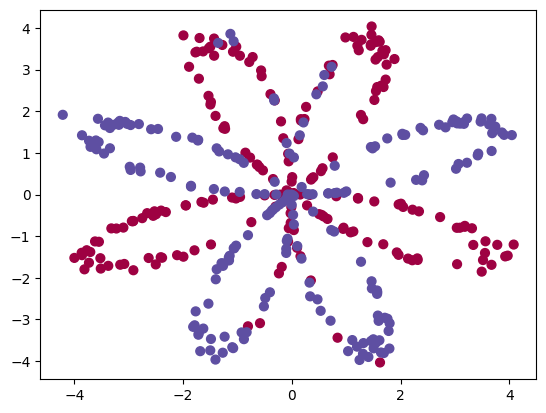

In [65]:
# Load the data
planarDataObj = PlanarDataset()
X, Y = planarDataObj.get_all_data()

# Visualize the data:
plt.scatter(X[0, :], X[1, :], c=Y[0, :], s=40, cmap=plt.cm.Spectral);

## Model definition and optimization

Functions bellow define a version of neural network with a single hidden layer, from Section "Behaviour of neural networks", using PyTorch functions. Note that similarly to above this code is not bug-free.

epoch[0] = 0.00459245
epoch[10] = 0.00426763
epoch[20] = 0.00420929
epoch[30] = 0.00411345
epoch[40] = 0.00386481
epoch[50] = 0.00380827
epoch[60] = 0.00356612
epoch[70] = 0.00310630
epoch[80] = 0.00272980
epoch[90] = 0.00242279
epoch[100] = 0.00228824
epoch[110] = 0.00215171
epoch[120] = 0.00220765
epoch[130] = 0.00208551
epoch[140] = 0.00204314
epoch[150] = 0.00192456
epoch[160] = 0.00197718
epoch[170] = 0.00194300
epoch[180] = 0.00190102
epoch[190] = 0.00186186
epoch[200] = 0.00184697
epoch[210] = 0.00184781
epoch[220] = 0.00171398
epoch[230] = 0.00176197
epoch[240] = 0.00178714
epoch[250] = 0.00175961
epoch[260] = 0.00190669
epoch[270] = 0.00169606
epoch[280] = 0.00176979
epoch[290] = 0.00200210


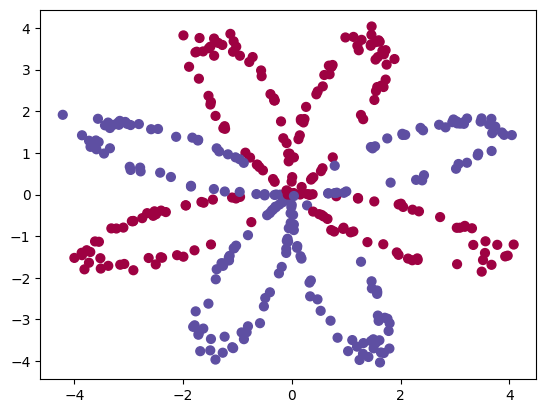

In [40]:
hidden_state_size = 5; 

# Define a model and loss 
linear1 = nn.Linear(in_features=2, out_features=hidden_state_size)
#for param in linear1.parameters():  
#    param.requires_grad = False
sigmoid = nn.Sigmoid()
linear2 = nn.Linear(in_features=hidden_state_size, out_features=1) 
model  = nn.Sequential(linear1,sigmoid,linear2,sigmoid)

# Define a loss 
MSELoss = nn.MSELoss()

# Set hyperparameters
learning_rate = 0.1
num_epochs = 300
batchsize = 64

# Setup the optimizer 
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate, momentum=0.9)

# Seup the dataset and dataloaders (one for training and one for testing)
#planarDataObj = PlanarDataset()
dataset_size = planarDataObj.__len__()
train_loader = torch.utils.data.DataLoader(planarDataObj, batch_size=batchsize, shuffle=True) ## Shuffle will randomly shuffle the data
test_loader = torch.utils.data.DataLoader(planarDataObj, batch_size=batchsize, shuffle=False)

# Training loop
for epoch in range(num_epochs):
    running_loss = 0.0
    for iter, data in enumerate(train_loader):
        # Get data for the minibatch
        input,target = data
        
        # We have to set gradients to zero at the start of every iteration
        optimizer.zero_grad() 
        
        # Forward pass through the model
        output = model(input)
        loss = MSELoss(output,target)
        running_loss += loss.item()
        
        # Backpropagation
        loss.backward()
        optimizer.step()

    # Print the loss per epoch    
    if epoch % 10 == 0: print('epoch[%d] = %.8f' % (epoch, running_loss / dataset_size))


%matplotlib inline

# Put model in evaluation mode
model.eval()

classEstimate = np.zeros((400,1), dtype='uint8')
all_data = np.zeros((400,2))

start_ind, end_ind = 0,0

# Testing loop
for i, data in  enumerate(test_loader):
    # Get data for the minibatch
    input, target = data
    num_samples = input.shape[0]
    
    # Forward pass through the trained model
    output = model(input)

    # Convert torch tensor output to numpy tensor
    output = output.detach().numpy()

    # Bookeeping on predictions
    end_ind = start_ind + num_samples
    all_data[start_ind:end_ind,:] = input.detach().numpy()
    classEstimate[start_ind:end_ind,0] = (output.squeeze() > 0.5)
    start_ind = end_ind

# Plot the result
all_data = all_data.T
plt.scatter(all_data[0, :],all_data[1, :], c=classEstimate[:,0], s=40, cmap=plt.cm.Spectral);

## **Debugging Strategy 2:** Remove all sources of randomness from the code

Note that while it is clear that the code above isn't performing as expected (loss does not go down) with every run of the cell you should see a slightly different result and order of loss values. This is because of inherent randomness in the code. While the randomness is good when learning (avoids biases) it is bad when debugging for obvious reasons. Modify the code above to make sure it executes the same way every time you run it. For this you will want to make use of the function below and also fix the randomness in dataloader. 

**Note:** Use the function below as well as look at ensuring that the order of data in the dataloader remains fixed. You may want to consult PyTorch guidelines on reproducibility https://pytorch.org/docs/stable/notes/randomness.html.

epoch[0] = 0.00431433
epoch[10] = 0.00427256
epoch[20] = 0.00415838
epoch[30] = 0.00410618
epoch[40] = 0.00400802
epoch[50] = 0.00396869
epoch[60] = 0.00384554
epoch[70] = 0.00371300
epoch[80] = 0.00379718
epoch[90] = 0.00387112
epoch[100] = 0.00368695
epoch[110] = 0.00382636
epoch[120] = 0.00360101
epoch[130] = 0.00343741
epoch[140] = 0.00311194
epoch[150] = 0.00286455
epoch[160] = 0.00248917
epoch[170] = 0.00240406
epoch[180] = 0.00225338
epoch[190] = 0.00214928
epoch[200] = 0.00199416
epoch[210] = 0.00205488
epoch[220] = 0.00194881
epoch[230] = 0.00209275
epoch[240] = 0.00190337
epoch[250] = 0.00188670
epoch[260] = 0.00196187
epoch[270] = 0.00184640
epoch[280] = 0.00206274
epoch[290] = 0.00184879


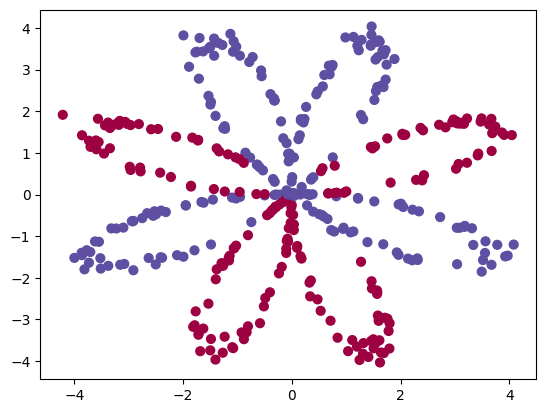

In [47]:
def fix_seeds():
    random_seed = 1      # or coluld be any of your favorite number 
    torch.manual_seed(random_seed)
    torch.cuda.manual_seed(random_seed)
    torch.backends.cudnn.deterministic = True
    torch.backends.cudnn.benchmark = False
    np.random.seed(random_seed)
    random.seed(random_seed)

fix_seeds()

# Copy the code from Section Model definition and optimization and modify accordingly
hidden_state_size = 5; 

# Define a model and loss 
linear1 = nn.Linear(in_features=2, out_features=hidden_state_size)
#for param in linear1.parameters():  
#    param.requires_grad = False
sigmoid = nn.Sigmoid()
linear2 = nn.Linear(in_features=hidden_state_size, out_features=1) 
model  = nn.Sequential(linear1,sigmoid,linear2,sigmoid)

# Define a loss 
MSELoss = nn.MSELoss()

# Set hyperparameters
learning_rate = 0.1
num_epochs = 300
batchsize = 64

# Setup the optimizer 
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate, momentum=0.9)

# Seup the dataset and dataloaders (one for training and one for testing)
#planarDataObj = PlanarDataset()
dataset_size = planarDataObj.__len__()
train_loader = torch.utils.data.DataLoader(planarDataObj, batch_size=batchsize, shuffle=True) ## Shuffle will randomly shuffle the data
test_loader = torch.utils.data.DataLoader(planarDataObj, batch_size=batchsize, shuffle=False)

# Training loop
for epoch in range(num_epochs):
    running_loss = 0.0
    for iter, data in enumerate(train_loader):
        # Get data for the minibatch
        input,target = data
        
        # We have to set gradients to zero at the start of every iteration
        optimizer.zero_grad() 
        
        # Forward pass through the model
        output = model(input)
        loss = MSELoss(output,target)
        running_loss += loss.item()
        
        # Backpropagation
        loss.backward()
        optimizer.step()

    # Print the loss per epoch    
    if epoch % 10 == 0: print('epoch[%d] = %.8f' % (epoch, running_loss / dataset_size))


%matplotlib inline

# Put model in evaluation mode
model.eval()

classEstimate = np.zeros((400,1), dtype='uint8')
all_data = np.zeros((400,2))

start_ind, end_ind = 0,0

# Testing loop
for i, data in  enumerate(test_loader):
    # Get data for the minibatch
    input, target = data
    num_samples = input.shape[0]
    
    # Forward pass through the trained model
    output = model(input)

    # Convert torch tensor output to numpy tensor
    output = output.detach().numpy()

    # Bookeeping on predictions
    end_ind = start_ind + num_samples
    all_data[start_ind:end_ind,:] = input.detach().numpy()
    classEstimate[start_ind:end_ind,0] = (output.squeeze() > 0.5)
    start_ind = end_ind

# Plot the result
all_data = all_data.T
plt.scatter(all_data[0, :],all_data[1, :], c=classEstimate[:,0], s=40, cmap=plt.cm.Spectral);

## **Debugging Strategy 3:** Train with minimal amount of data 

It may still be difficult to identify what is wrong based on results in Section "Remove all sources of randomness from the code". A really good strategy, especially for model debugging, is to try optimizing with a single example/sample. Modify the code from Section "Remove all sources of randomness from the code" in order to do this. Once you do and run it, it should be obvious that there is a bug in your code and what that bug might be. 

epoch[0] = 0.26096378
epoch[10] = 0.11718487
epoch[20] = 0.11003170
epoch[30] = 0.10002018
epoch[40] = 0.09895738
epoch[50] = 0.09939169
epoch[60] = 0.09129522
epoch[70] = 0.09865116
epoch[80] = 0.09604776
epoch[90] = 0.09273847
epoch[100] = 0.09659365
epoch[110] = 0.09346088
epoch[120] = 0.08950559
epoch[130] = 0.09081675
epoch[140] = 0.09124950
epoch[150] = 0.09402700
epoch[160] = 0.09419294
epoch[170] = 0.09258479
epoch[180] = 0.08818700
epoch[190] = 0.09148469
epoch[200] = 0.08414876
epoch[210] = 0.08785809
epoch[220] = 0.09789751
epoch[230] = 0.09142608
epoch[240] = 0.09116603
epoch[250] = 0.08742627
epoch[260] = 0.09268468
epoch[270] = 0.08834292
epoch[280] = 0.08822772
epoch[290] = 0.08451341


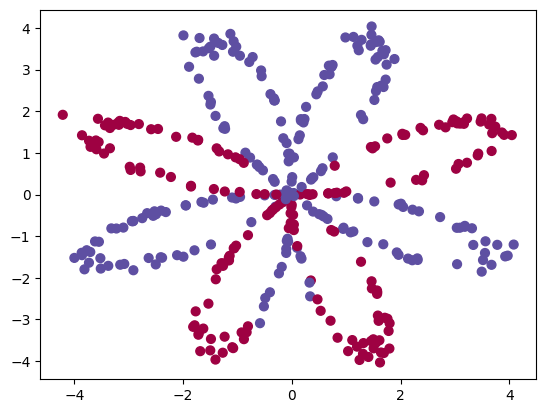

In [48]:
# Copy the code from Section "Remove all sources of randomness from the code" and modify to run with batch size of 1 and only one / same batch used in each epoch.
def fix_seeds():
    random_seed = 1      # or coluld be any of your favorite number 
    torch.manual_seed(random_seed)
    torch.cuda.manual_seed(random_seed)
    torch.backends.cudnn.deterministic = True
    torch.backends.cudnn.benchmark = False
    np.random.seed(random_seed)
    random.seed(random_seed)

fix_seeds()

# Copy the code from Section Model definition and optimization and modify accordingly
hidden_state_size = 5; 

# Define a model and loss 
linear1 = nn.Linear(in_features=2, out_features=hidden_state_size)
#for param in linear1.parameters():  
#    param.requires_grad = False
sigmoid = nn.Sigmoid()
linear2 = nn.Linear(in_features=hidden_state_size, out_features=1) 
model  = nn.Sequential(linear1,sigmoid,linear2,sigmoid)

# Define a loss 
MSELoss = nn.MSELoss()

# Set hyperparameters
learning_rate = 0.1
num_epochs = 300
batchsize = 1

# Setup the optimizer 
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate, momentum=0.9)

# Seup the dataset and dataloaders (one for training and one for testing)
#planarDataObj = PlanarDataset()
dataset_size = planarDataObj.__len__()
train_loader = torch.utils.data.DataLoader(planarDataObj, batch_size=batchsize, shuffle=True) ## Shuffle will randomly shuffle the data
test_loader = torch.utils.data.DataLoader(planarDataObj, batch_size=batchsize, shuffle=False)

# Training loop
for epoch in range(num_epochs):
    running_loss = 0.0
    for iter, data in enumerate(train_loader):
        # Get data for the minibatch
        input,target = data
        
        # We have to set gradients to zero at the start of every iteration
        optimizer.zero_grad() 
        
        # Forward pass through the model
        output = model(input)
        loss = MSELoss(output,target)
        running_loss += loss.item()
        
        # Backpropagation
        loss.backward()
        optimizer.step()

    # Print the loss per epoch    
    if epoch % 10 == 0: print('epoch[%d] = %.8f' % (epoch, running_loss / dataset_size))


%matplotlib inline

# Put model in evaluation mode
model.eval()

classEstimate = np.zeros((400,1), dtype='uint8')
all_data = np.zeros((400,2))

start_ind, end_ind = 0,0

# Testing loop
for i, data in  enumerate(test_loader):
    # Get data for the minibatch
    input, target = data
    num_samples = input.shape[0]
    
    # Forward pass through the trained model
    output = model(input)

    # Convert torch tensor output to numpy tensor
    output = output.detach().numpy()

    # Bookeeping on predictions
    end_ind = start_ind + num_samples
    all_data[start_ind:end_ind,:] = input.detach().numpy()
    classEstimate[start_ind:end_ind,0] = (output.squeeze() > 0.5)
    start_ind = end_ind

# Plot the result
all_data = all_data.T
plt.scatter(all_data[0, :],all_data[1, :], c=classEstimate[:,0], s=40, cmap=plt.cm.Spectral);

epoch[0] = 0.00328367
epoch[10] = 0.00000497
epoch[20] = 0.00000412
epoch[30] = 0.00000361
epoch[40] = 0.00000318
epoch[50] = 0.00000283
epoch[60] = 0.00000252
epoch[70] = 0.00000231
epoch[80] = 0.00000208
epoch[90] = 0.00000196
epoch[100] = 0.00000181
epoch[110] = 0.00000168
epoch[120] = 0.00000159
epoch[130] = 0.00000151
epoch[140] = 0.00000137
epoch[150] = 0.00000131
epoch[160] = 0.00000126
epoch[170] = 0.00000119
epoch[180] = 0.00000115
epoch[190] = 0.00000111
epoch[200] = 0.00000105
epoch[210] = 0.00000101
epoch[220] = 0.00000096
epoch[230] = 0.00000092
epoch[240] = 0.00000089
epoch[250] = 0.00000085
epoch[260] = 0.00000084
epoch[270] = 0.00000080
epoch[280] = 0.00000079
epoch[290] = 0.00000075


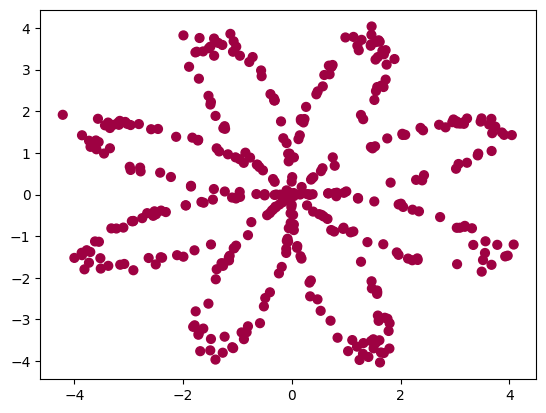

In [31]:
# Once you find the bug, fix it here and make sure you can effectively reproduce the result in Section "Behaviour of neural networks"
def fix_seeds():
    random_seed = 1      # or coluld be any of your favorite number 
    torch.manual_seed(random_seed)
    torch.cuda.manual_seed(random_seed)
    torch.backends.cudnn.deterministic = True
    torch.backends.cudnn.benchmark = False
    np.random.seed(random_seed)
    random.seed(random_seed)

fix_seeds()

# Copy the code from Section Model definition and optimization and modify accordingly
hidden_state_size = 5; 

# Define a model and loss 
linear1 = nn.Linear(in_features=2, out_features=hidden_state_size)
#for param in linear1.parameters():  
#    param.requires_grad = False
sigmoid = nn.Sigmoid()
linear2 = nn.Linear(in_features=hidden_state_size, out_features=1) 
model  = nn.Sequential(linear1,sigmoid,linear2,sigmoid)

# Define a loss 
MSELoss = nn.MSELoss()

# Set hyperparameters
learning_rate = 0.1
num_epochs = 300
batchsize = 64

# Setup the optimizer 
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate, momentum=0.9)

# Seup the dataset and dataloaders (one for training and one for testing)
planarDataObj = PlanarDataset()
dataset_size = planarDataObj.__len__()
train_loader = torch.utils.data.DataLoader(planarDataObj, batch_size=batchsize, shuffle=True) ## Shuffle will randomly shuffle the data
test_loader = torch.utils.data.DataLoader(planarDataObj, batch_size=batchsize, shuffle=False)

# Training loop
for epoch in range(num_epochs):
    running_loss = 0.0
    for iter, data in enumerate(train_loader):
        # Get data for the minibatch
        input,target = data
        
        # We have to set gradients to zero at the start of every iteration
        optimizer.zero_grad() 
        
        # Forward pass through the model
        output = model(input)
        loss = MSELoss(output,target)
        running_loss += loss.item()
        
        # Backpropagation
        loss.backward()
        optimizer.step()

    # Print the loss per epoch    
    if epoch % 10 == 0: print('epoch[%d] = %.8f' % (epoch, running_loss / dataset_size))


%matplotlib inline

# Put model in evaluation mode
model.eval()

classEstimate = np.zeros((400,1), dtype='uint8')
all_data = np.zeros((400,2))

start_ind, end_ind = 0,0

# Testing loop
for i, data in  enumerate(test_loader):
    # Get data for the minibatch
    input, target = data
    num_samples = input.shape[0]
    
    # Forward pass through the trained model
    output = model(input)

    # Convert torch tensor output to numpy tensor
    output = output.detach().numpy()

    # Bookeeping on predictions
    end_ind = start_ind + num_samples
    all_data[start_ind:end_ind,:] = input.detach().numpy()
    classEstimate[start_ind:end_ind,0] = (output.squeeze() > 0.5)
    start_ind = end_ind

# Plot the result
all_data = all_data.T
plt.scatter(all_data[0, :],all_data[1, :], c=classEstimate[:,0], s=40, cmap=plt.cm.Spectral);

## **Debugging Strategy 4:** Use Tensorboard or similar.

At this point the model and training code should be correct and you should be able to train the model. However, the hyperparameters may still not be optimal. For hyperparameter tuning and to log many experiments it is advisable to use some way to visualise the training process. Tensorboard provides such ability. Another alternative is Weights & Biases.  

Let’s now try using TensorBoard with PyTorch! Before logging anything, we need to create a SummaryWriter instance. Writer will output to ./runs/ directory by default.

In [32]:
import torch
from torch.utils.tensorboard import SummaryWriter
writer = SummaryWriter()

ModuleNotFoundError: No module named 'tensorboard'

We can use `add_scalar(tag, scalar_value, global_step=None, walltime=None)` to log scalar values (e.g. loss). We have to call `flush()` method to make sure that all pending events have been written to disk. Finally if we do not need the summary writer anymore, then call `close()` method.

Your next task is to slightly modify the code to log the Loss and Accuracy into the Tesnorboard log file. This will require modifying the training loop as follows:

```
for epoch in range(num_epochs):
    running_loss = 0.0
    total_correct = 0
    for iter, data in enumerate(train_loader):
        # Get data for the minibatch
        input,target = data

        # We have to set gradients to zero at the start of every iteration
        optimizer.zero_grad() 

        # Forward pass through the model
        output = model(input)
        loss = MSELoss(output,target)
        running_loss += loss.item()
        total_correct += output.argmax(dim=1).eq(target).sum().item()
        
        # Backpropagation
        loss.backward()
        optimizer.step()
    
    # Log accuracy and loss
    writer.add_scalar("Loss/train", running_loss, epoch)
    writer.add_scalar("Accuracy", total_correct/ dataset_size, epoch)
        
    if epoch % 10 == 0: print('epoch[%d] = %.8f' % (epoch, running_loss / dataset_size))

# Flush and close the log file
writer.flush()
writer.close()
```




In [ ]:
# Insert your code here

Now install the tensorboard

In [ ]:
!pip install tensorboard

Now to start tensorboard in google colab we can run following command.

In [ ]:
%load_ext tensorboard
%tensorboard --logdir runs